In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10


from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
df=pd.read_csv("data/Bitstamp_BTCUSD_d.csv")
df.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1646611200,2022-03-07 00:00:00,BTC/USD,38404.97,38483.92,38021.39,38390.55,28.574703,1.096999e+06
1,1646524800,2022-03-06 00:00:00,BTC/USD,39390.31,39701.00,38100.00,38438.89,1194.373734,4.591040e+07
2,1646438400,2022-03-05 00:00:00,BTC/USD,39170.19,39620.30,38600.30,39416.79,806.911429,3.180586e+07
3,1646352000,2022-03-04 00:00:00,BTC/USD,42476.25,42540.57,38590.95,39175.56,2493.657430,9.769043e+07
4,1646265600,2022-03-03 00:00:00,BTC/USD,43936.73,44118.53,41832.34,42476.26,2253.430770,9.571731e+07


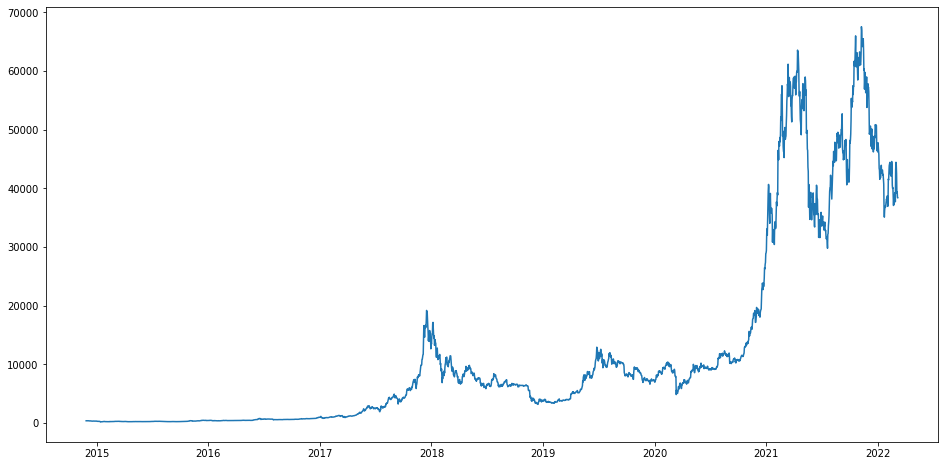

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')



In [2]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset

NameError: name 'df' is not defined

In [5]:
max = new_dataset.Close.max()
min = new_dataset.Close.min()
normalized_dataset = new_dataset
for _,row in normalized_dataset.iterrows():
    row.Close = (row.Close - min)/(max - min)

normalized_dataset

,Date,Close
0,2014-11-28 00:00:00,0.003179
1,2014-11-29 00:00:00,0.003186
2,2014-11-30 00:00:00,0.003136
3,2014-12-01 00:00:00,0.003211
4,2014-12-02 00:00:00,0.003223
...,...,...
2652,2022-03-03 00:00:00,0.627836
2653,2022-03-04 00:00:00,0.578862
2654,2022-03-05 00:00:00,0.582441
2655,2022-03-06 00:00:00,0.567932


In [18]:
dataframe_close = new_dataset.Close.values
df =dataframe_close.reshape(-1,1)

In [21]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])


532

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [9]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [10]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
65/65 [==============================] - 12s 92ms/step - loss: 0.0092
Epoch 2/50
65/65 [==============================] - 6s 91ms/step - loss: 0.0028
Epoch 3/50
65/65 [==============================] - 6s 93ms/step - loss: 0.0026
Epoch 4/50
65/65 [==============================] - 6s 91ms/step - loss: 0.0022
Epoch 5/50
65/65 [==============================] - 6s 92ms/step - loss: 0.0021
Epoch 6/50
65/65 [==============================] - 6s 93ms/step - loss: 0.0018
Epoch 7/50
65/65 [==============================] - 6s 91ms/step - loss: 0.0018
Epoch 8/50
65/65 [==============================] - 6s 91ms/step - loss: 0.0018
Epoch 9/50
65/65 [==============================] - 6s 93ms/step - loss: 0.0016
Epoch 10/50
65/65 [==============================] - 6s 91ms/step - loss: 0.0016
Epoch 11/50
65/65 [==============================] - 7s 113ms/step - loss: 0.0014
Epoch 12/50
65/65 [==============================] - 6s 96ms/step - loss: 0.0014
Epoch 13/50
65/65 [================

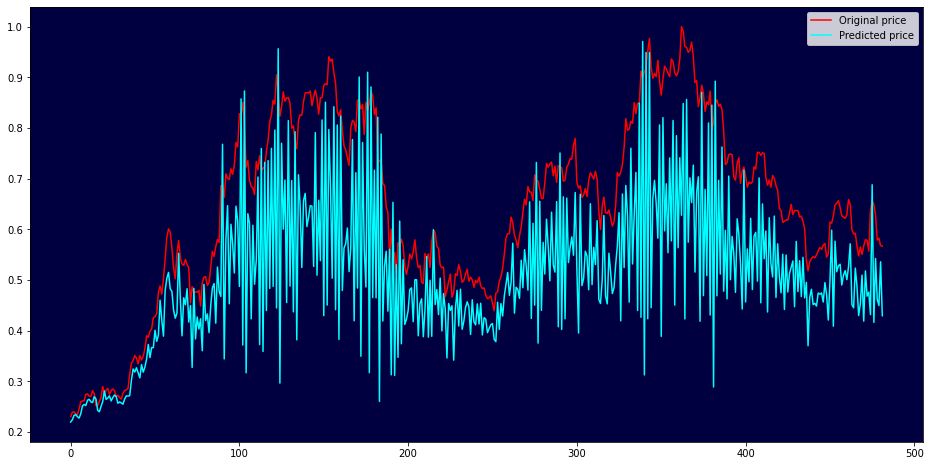

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()